In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime


In [2]:
covid_df=pd.read_csv("covid_19_india.csv")

In [3]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [5]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [6]:
vaccine_df=pd.read_csv("covid_vaccine_statewise.csv")

In [7]:
vaccine_df.head(7)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0


In [8]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [9]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [10]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [11]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [12]:
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
print(covid_df.tail())

      Date State/UnionTerritory  Cured  Deaths  Confirmed  Active_Cases
15109  NaT                  NaN    NaN     NaN        NaN           NaN
15110  NaT                  NaN    NaN     NaN        NaN           NaN
15111  NaT                  NaN    NaN     NaN        NaN           NaN
15112  NaT                  NaN    NaN     NaN        NaN           NaN
15113  NaT                  NaN    NaN     NaN        NaN           NaN


In [13]:
statewise = pd.pivot_table(
    covid_df,
    values=["Confirmed", "Deaths", "Cured"],
    index="State/UnionTerritory",
    aggfunc="max" 
)
print(statewise)

                                          Confirmed      Cured   Deaths
State/UnionTerritory                                                   
Andaman and Nicobar Islands                  6674.0     6359.0     92.0
Andhra Pradesh                            1475372.0  1254291.0   9580.0
Arunachal Pradesh                           22462.0    19977.0     88.0
Assam                                      340858.0   290774.0   2344.0
Bihar                                      664115.0   595377.0   4039.0
Cases being reassigned to states             9265.0        0.0      0.0
Chandigarh                                  56513.0    48831.0    647.0
Chhattisgarh                               925531.0   823113.0  12036.0
Dadra and Nagar Haveli and Daman and Diu     9652.0     8944.0      4.0
Daman & Diu                                     2.0        0.0      0.0
Delhi                                     1402873.0  1329899.0  22111.0
Goa                                        138776.0   112633.0  

In [14]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [15]:
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [16]:
statewise=statewise.sort_values(by="Confirmed",ascending=False)

In [17]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


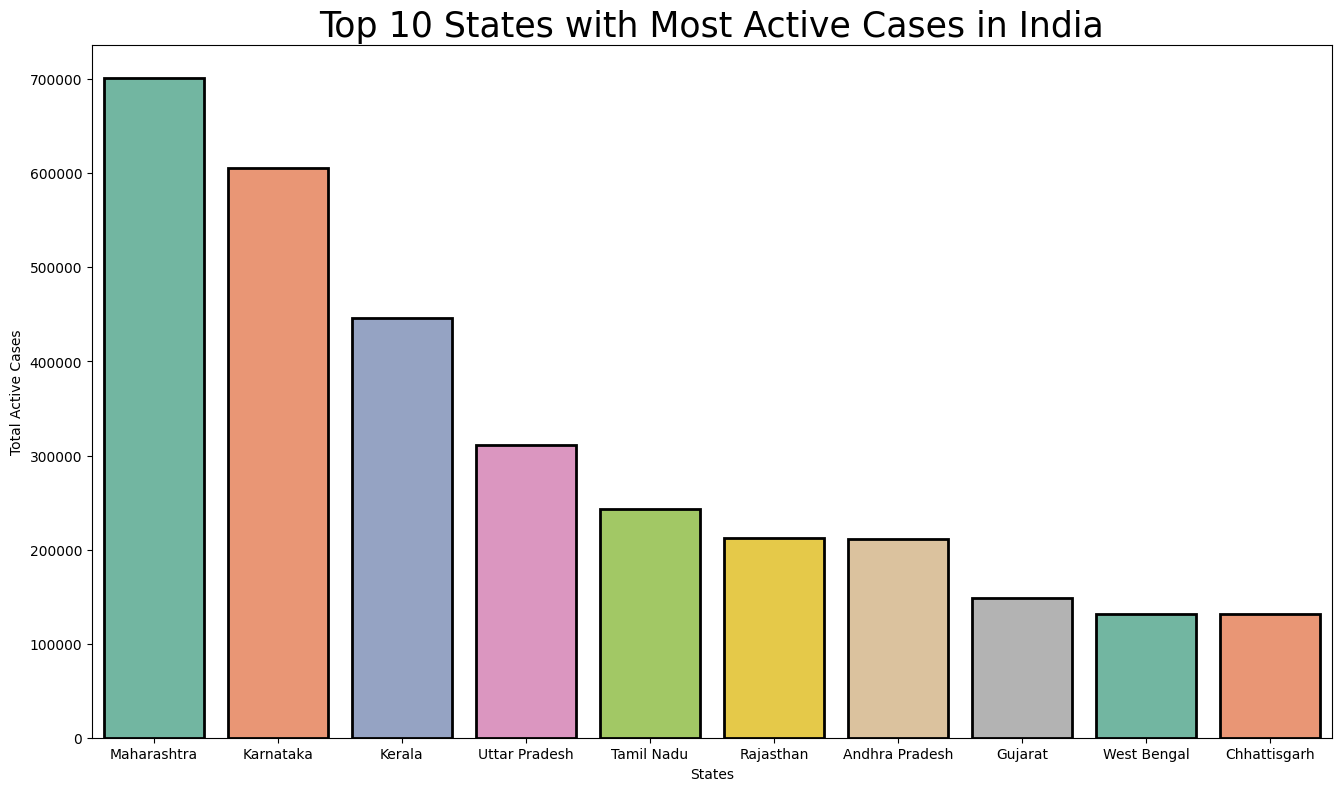

In [18]:
top_10_active_cases = covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending=False).reset_index()
fig = plt.figure(figsize=(16, 9))
plt.title("Top 10 States with Most Active Cases in India", size=25)
palette = sns.color_palette("Set2", len(top_10_active_cases.iloc[:10]))
ax = sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_Cases",x="State/UnionTerritory",linewidth=2, 
 edgecolor='black', palette=palette,hue='State/UnionTerritory',legend=False)
plt.xlabel("States")
plt.ylabel("Total Active Cases",)
plt.show()

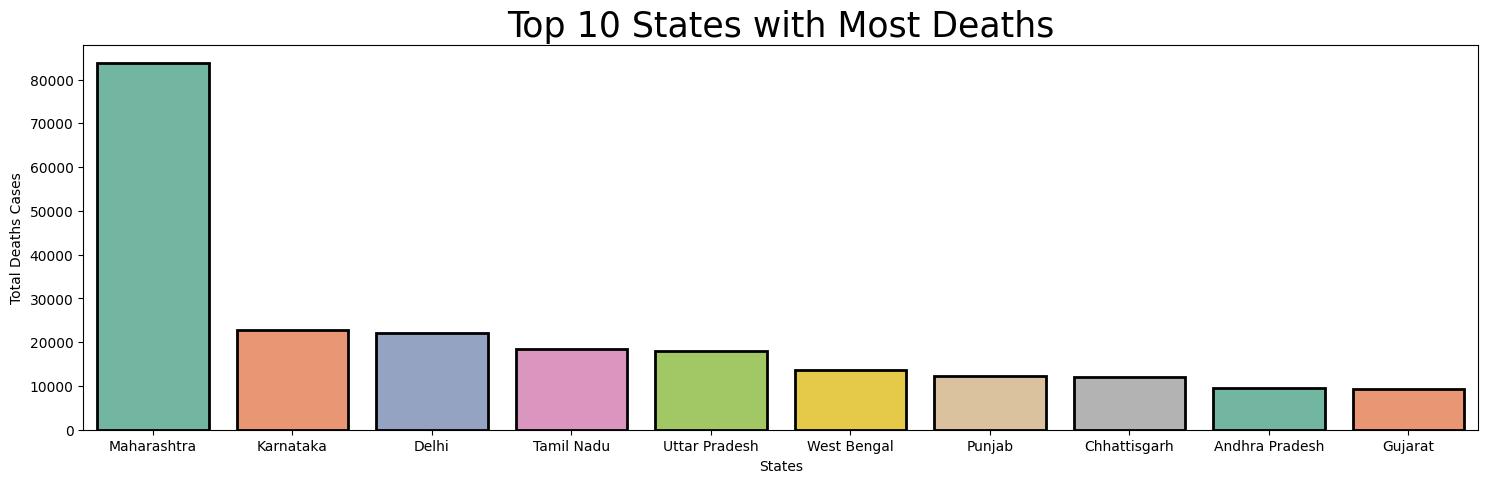

In [19]:
top_10_deaths = covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by=['Deaths'], ascending=False).reset_index()
fig = plt.figure(figsize=(18, 5))
plt.title("Top 10 States with Most Deaths", size=25)
palette = sns.color_palette("Set2", len(top_10_deaths.iloc[:10]))
ax = sns.barplot(data=top_10_deaths.iloc[:10], y="Deaths", x="State/UnionTerritory",linewidth=2,
edgecolor='black', palette=palette,hue='State/UnionTerritory',legend=False)
plt.xlabel("States")
plt.ylabel("Total Deaths Cases")
plt.show()


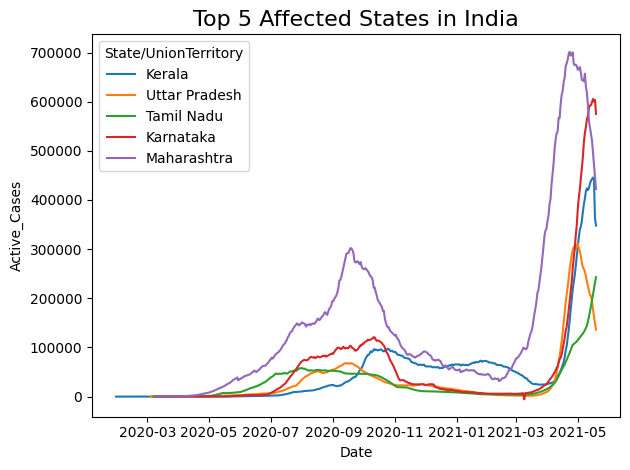

In [21]:
ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 
 'Kerala',  'Tamil Nadu', 'Uttar Pradesh'])],x='Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title("Top 5 Affected States in India", size=16)
plt.tight_layout()  

In [22]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [23]:
vaccine_df.rename(columns={'Updated On':'Vaccine_Date'},inplace=True)

In [24]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [25]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [26]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [27]:
vaccination = vaccine_df.drop(columns=['Sputnik V (Doses Administered)', 'AEFI',
'18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], 
axis=1)


In [28]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [29]:
male = vaccination["Male(Individuals Vaccinated)"].sum()
female = vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male", "Female"], values=[male, female], title="Male and Female Vaccination")

In [30]:
#Remove rows where state = India
vaccine=vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
vaccine_df.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [32]:
#Most Vaccinated States
max_vac=vaccine_df.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac

,Total
State,
India,1.346231e+10
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09


C:\Users\bjbis\AppData\Local\Temp\ipykernel_12536\4245574437.py:3: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



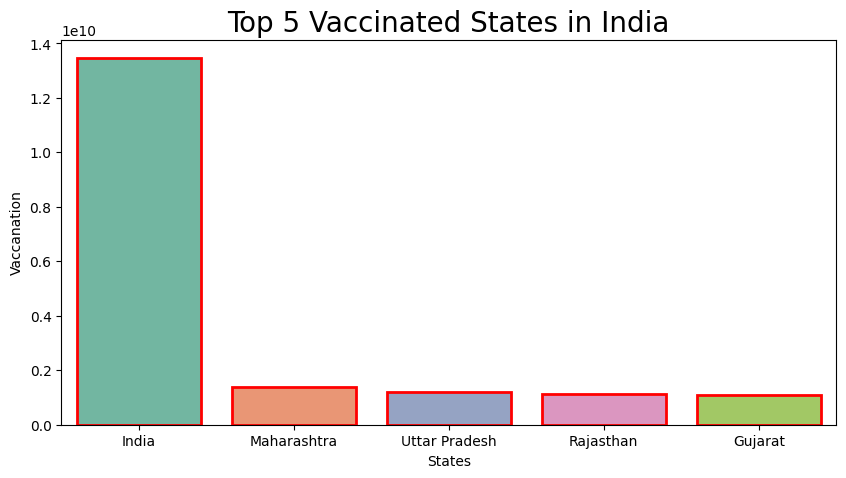

In [36]:
fig = plt.figure(figsize=(10, 5))
plt.title("Top 5 Vaccinated States in India", size=20)
ax = sns.barplot(data=max_vac.iloc[:5],y=max_vac.Total,x=max_vac.index,linewidth=2, edgecolor='red',
palette=palette, hue=max_vac.index,dodge=False)
plt.xlabel("States")
plt.ylabel("Vaccanation",)
plt.show()

C:\Users\bjbis\AppData\Local\Temp\ipykernel_12536\348631937.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



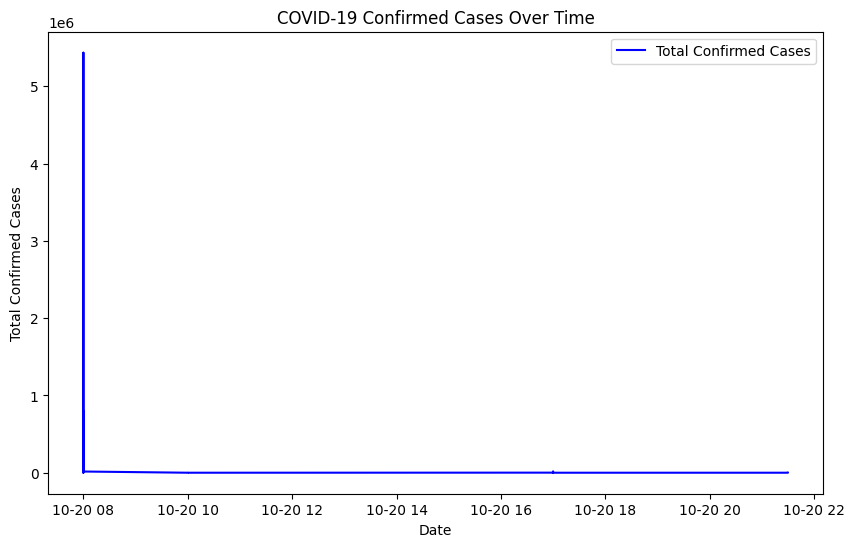

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Users\bjbis\AppData\Local\Progr

Confirmed                 mean        mean_se  mean_ci_lower  mean_ci_upper
2024-10-21 08:00:00  50.431149  415498.443952 -814311.554630  814412.416928
2024-10-22 08:00:00  50.431149  415521.272455 -814356.297672  814457.159970
2024-10-23 08:00:00  50.431149  415544.099703 -814401.038257  814501.900555
2024-10-24 08:00:00  50.431149  415566.925697 -814445.776384  814546.638682
2024-10-25 08:00:00  50.431149  415589.750438 -814490.512054  814591.374351
2024-10-26 08:00:00  50.431149  415612.573925 -814535.245266  814636.107564
2024-10-27 08:00:00  50.431149  415635.396159 -814579.976023  814680.838321
2024-10-28 08:00:00  50.431149  415658.217140 -814624.704323  814725.566621
2024-10-29 08:00:00  50.431149  415681.036868 -814669.430168  814770.292466
2024-10-30 08:00:00  50.431149  415703.855343 -814714.153558  814815.015856
2024-10-31 08:00:00  50.431149  415726.672566 -814758.874493  814859.736791
2024-11-01 08:00:00  50.431149  415749.488536 -814803.592974  814904.455271
2024-11-02 0

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\bjbis\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



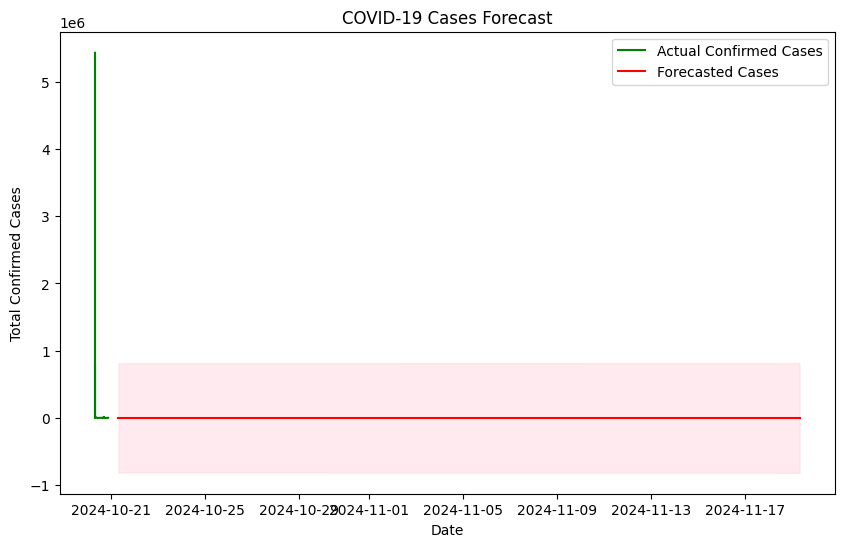

Confirmed                 mean  mean_ci_lower  mean_ci_upper
2024-10-21 08:00:00  50.431149 -814311.554630  814412.416928
2024-10-22 08:00:00  50.431149 -814356.297672  814457.159970
2024-10-23 08:00:00  50.431149 -814401.038257  814501.900555
2024-10-24 08:00:00  50.431149 -814445.776384  814546.638682
2024-10-25 08:00:00  50.431149 -814490.512054  814591.374351
2024-10-26 08:00:00  50.431149 -814535.245266  814636.107564
2024-10-27 08:00:00  50.431149 -814579.976023  814680.838321
2024-10-28 08:00:00  50.431149 -814624.704323  814725.566621
2024-10-29 08:00:00  50.431149 -814669.430168  814770.292466
2024-10-30 08:00:00  50.431149 -814714.153558  814815.015856
2024-10-31 08:00:00  50.431149 -814758.874493  814859.736791
2024-11-01 08:00:00  50.431149 -814803.592974  814904.455271
2024-11-02 08:00:00  50.431149 -814848.309000  814949.171298
2024-11-03 08:00:00  50.431149 -814893.022573  814993.884871
2024-11-04 08:00:00  50.431149 -814937.733693  815038.595991
2024-11-05 08:00:00  50.

In [37]:
df = pd.read_csv('covid_19_india.csv')  
df['Date'] = pd.to_datetime(df['Time'])  
df = df.set_index('Date')  
df = df.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(df['Confirmed'], label='Total Confirmed Cases', color='blue')  
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.show()

model = ARIMA(df['Confirmed'], order=(2, 1, 2))  
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[0] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index
print(forecast_df)

plt.figure(figsize=(10, 6))
plt.plot(df['Confirmed'], label='Actual Confirmed Cases', color='green')
plt.plot(forecast_df['mean'], label='Forecasted Cases', color='red')
plt.fill_between(forecast_df.index,forecast_df['mean_ci_lower'],forecast_df['mean_ci_upper'],color='pink', alpha=0.3)  
plt.title('COVID-19 Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.show()

print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])
